In [133]:
import os
import random
import hickle as hkl
import pickle as pickle
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # Visible devices must be set at program startup
    print(e)

In [134]:
DATADIR = r'./Data/'
TRAIN_DATADIR = os.path.join(DATADIR, 'training_set')
TEST_DATADIR = os.path.join(DATADIR, 'test_set')

In [135]:
CATEGORIES = []
for d in os.listdir(TRAIN_DATADIR):
    CATEGORIES.append(d)
print(CATEGORIES)

['cats', 'dogs']


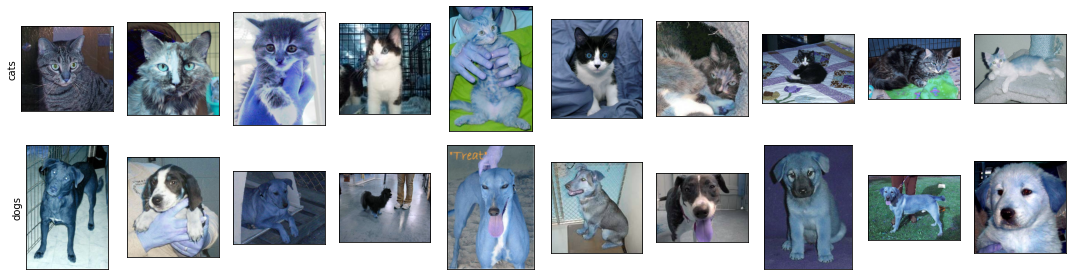

In [136]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATADIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [137]:
IMG_DIM_SIZE = 160

In [138]:
train_data = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_DIM_SIZE, IMG_DIM_SIZE)) 
            train_data.append([img_resized, class_num]) 
        except WException as e:
            pass       
print(len(train_data))

100%|██████████| 4005/4005 [00:07<00:00, 540.45it/s]

8005


In [139]:
test_data = []
for c in CATEGORIES:
    path = os.path.join(TEST_DATADIR, c) 
    class_num = c
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_DIM_SIZE, IMG_DIM_SIZE)) 
            test_data.append([img_resized, class_num]) 
        except WException as e:
            pass       
print(len(test_data))


100%|██████████| 1012/1012 [00:02<00:00, 499.50it/s]

2021


In [140]:
print(test_data)
random.shuffle(train_data)
random.shuffle(test_data)

[[array([[[  9,   9,  14],
        [108,  91, 114],
        [ 87,  85,  91],
        ...,
        [ 72,  63,  73],
        [ 78,  74,  80],
        [  7,   4,   6]],

       [[  6,   6,  10],
        [131, 119, 140],
        [137, 137, 138],
        ...,
        [118, 107, 102],
        [103,  96,  96],
        [  6,   4,   4]],

       [[  5,  17,  19],
        [123, 117, 137],
        [246, 250, 245],
        ...,
        [177, 163, 136],
        [ 91,  82,  73],
        [  9,   4,   5]],

       ...,

       [[ 10,   5,  11],
        [134, 122, 142],
        [253, 251, 251],
        ...,
        [199, 192, 183],
        [ 83,  80,  76],
        [  6,   4,   4]],

       [[ 13,   9,   9],
        [ 86,  76,  90],
        [ 84,  79,  80],
        ...,
        [ 66,  60,  58],
        [ 65,  65,  61],
        [  4,   4,   4]],

       [[  3,   5,   0],
        [  4,   1,   6],
        [  8,   5,   6],
        ...,
        [  6,   4,   4],
        [  0,   1,   0],
        [  1,   1,   1

In [141]:
X_train = []
Y_train = []

for img, label in train_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_DIM_SIZE,IMG_DIM_SIZE,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

pickle_out = open("./data/pickle/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("./data/pickle/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()



X_train= (8005, 160, 160, 3) Y_train= (8005,)


FileNotFoundError: [Errno 2] No such file or directory: './data/pickle/X_train.pickle'

In [ ]:
X_test = []
Y_test = []

for img, label in test_data:
    X_test.append(img)
    Y_test.append(label)
    
X_test = np.array(X_test).astype('float32').reshape(-1,IMG_DIM_SIZE,IMG_DIM_SIZE,3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")


pickle_out = open("./data/pickle/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("./data/pickle/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()


X_test= (2021, 160, 160, 3) Y_test= (2021,)
